# Introduction

The project is a part of my thesis, which focuses on the effect of brand crisis and crisis response strategies on consumer-brand relationship of an online platform brand, in the context of online community. To answer the research questions, I looked at the specific case of Tinder and all of its crises between 2018 and 2019. 

This project attempts to examine one out of three hypotheses proposed in my thesis, namely: **The occurence of brand crisis has a negative effect on (1) online community’s sentiment and (2) volume of participation.**

#### Data

All data used in this project is kindly provided by my thesis supervisor. They include

1. Company: Table of 403 companies and their crises between 2010 and 2019: Details on the variables of this table can be found here: https://drive.google.com/file/d/1OKLMGfMIrpae7BRQ8W-sYxDbkww-_7Sp/view?usp=sharing
2. Comment: Table of +124k Reddit comments collected from 6 Tinder-related subreddits between 2018 and 2019
3. Team: Table that shows specific crises that have been mentioned in Tinder-related subreddits between 2018 and 2019. 


#### Approach

The main approach is to perform regression analysis on users' comments on 6 Tinder-related Subreddits to see whether there is any significant direct negative effect of brand crisis on community's sentiment and volume of participation.

Since there are two dependent variables to be study: sentiment and volume of participation, the study is split into 2 smaller studies: the first having community's sentiment as the focal outcome variable, and the second having volume of participation as the focal outcome variable. The independent variable of both studies is the occurence of brand crisis (if the comment is written before the crisis, variable equals 0; otherwise, variable equals 1). Control variables of these two models include crisis characteristics (crisis’ related issues, severity, novelty, and reach), channels (subreddits). Finally, I extend these models to investigate the interaction effect between brand crisis and subreddits since interest and belief might differ across subreddits, which influence members’ perception, hence, sentiment and participation towards the crisis.

Therefore, the regression models of these two studies are as follows:

1. community's sentiment ~ occurence of crisis + crisis related issues + severity + novelty + reach + subreddit:occurence of crisis
2. volume of participation ~ occurence of crisis + crisis related issues + severity + novelty + reach + subreddit:occurence of crisis

Furthermore, sentiment analysis will be conducted to derive sentiment score of users' comments, which is later used as an input for the first study on community's sentiment.


# Import data

In [2]:
install.packages(c("dplyr","tidyverse", "sentimentr", "magrittr", "car", "stargazer", "psych"))

Warning message:
"packages 'dplyr', 'tidyverse', 'sentimentr', 'magrittr', 'car', 'stargazer', 'psych' are in use and will not be installed"


In [3]:
library(dplyr)
library(tidyverse)
library(data.table)
library(sentimentr)
library(textclean)
library(tm)
library(stringr)
library(magrittr)
library(car)
library(stargazer)
library(ggplot2)
library(psych)

In [4]:
#List of companies and crises
dir_comp <- "C:/Users/Admin/OneDrive - Erasmus University Rotterdam/Documents/RSM/IBA 3/Bachelor Project/companies_and_crises.csv"
company <- read.csv(dir_comp)
company

RepRisk_ID,RepRisk_story_ID,news_date,related_issues,related_topic_tags,related_UNGC_principles,related_countries_codes,severity,novelty,reach,company,subreddit,year
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
1005,22629,2011-06-01,"Impacts on landscapes, ecosystems and biodiversity;Climate change, GHG emissions, and global pollution;Violation of national legislation;Supply chain issues;Controversial products and services",Protected areas;Endangered species;High conservation value forests;Illegal logging,Principle 7 (Environment);Principle 8 (Environment);Principle 9 (Environment),CN;ID,2,2,2,Hasbro Inc,hasbro,2011
1005,22629,2011-06-01,"Impacts on landscapes, ecosystems and biodiversity;Climate change, GHG emissions, and global pollution;Violation of national legislation;Supply chain issues;Controversial products and services",Protected areas;Endangered species;High conservation value forests;Illegal logging,Principle 7 (Environment);Principle 8 (Environment);Principle 9 (Environment),CN;ID,2,2,2,Hasbro Inc,hasbrogonewild,2011
1005,229290,2017-06-16,Violation of national legislation;Human rights abuses and corporate complicity;Supply chain issues;Occupational health and safety issues;Poor employment conditions;Forced labor;Fraud,Migrant labor,Principle 1 (Human Rights);Principle 2 (Human Rights);Principle 4 (Labour),US,2,2,2,Hasbro Inc,hasbro,2017
1005,229290,2017-06-16,Violation of national legislation;Human rights abuses and corporate complicity;Supply chain issues;Occupational health and safety issues;Poor employment conditions;Forced labor;Fraud,Migrant labor,Principle 1 (Human Rights);Principle 2 (Human Rights);Principle 4 (Labour),US,2,2,2,Hasbro Inc,hasbrogonewild,2017
1005,248643,2017-08-29,Violation of national legislation;Occupational health and safety issues;Poor employment conditions;Forced labor,,Principle 1 (Human Rights);Principle 4 (Labour),US,1,2,2,Hasbro Inc,hasbro,2017
1005,248643,2017-08-29,Violation of national legislation;Occupational health and safety issues;Poor employment conditions;Forced labor,,Principle 1 (Human Rights);Principle 4 (Labour),US,1,2,2,Hasbro Inc,hasbrogonewild,2017
1005,178432,2016-11-15,Violation of national legislation;Occupational health and safety issues;Poor employment conditions;Fraud,,Principle 1 (Human Rights),CN,2,2,1,Hasbro Inc,hasbro,2016
1005,178432,2016-11-15,Violation of national legislation;Occupational health and safety issues;Poor employment conditions;Fraud,,Principle 1 (Human Rights),CN,2,2,1,Hasbro Inc,hasbrogonewild,2016
1005,67464,2013-12-02,Violation of national legislation;Occupational health and safety issues;Poor employment conditions;Freedom of association and collective bargaining;Discrimination in employment,,Principle 1 (Human Rights);Principle 3 (Labour);Principle 6 (Labour),CN,2,2,1,Hasbro Inc,hasbro,2013


In [5]:
#Reddit commments
#These comments are random comments that might or might not be related to the crisis
dir <- "C:/Users/Admin/OneDrive - Erasmus University Rotterdam/Documents/RSM/IBA 3/Bachelor Project/Team5_text.csv"
comment <- read.csv(dir, stringsAsFactors = FALSE, encoding="UTF-8")
comment

selftext,id,subreddit,date
<chr>,<chr>,<chr>,<chr>
##r/indianpeoplefacebook ##r/tinder --------------------------------------------- ^(For mobile and non-RES users) ^| [^(More info)](https://np.reddit.com/r/botwatch/comments/6xrrvh/clickablelinkbot_info/) ^| ^(-1 to Remove) ^| [^(Ignore Sub)](https://np.reddit.com/r/ClickableLinkBot/comments/6xrtxg/ignore_list/),dtm8jpm,indianboysontinder,2018-02-02
"&gt; 82 movies in theatre Not only did he spend about <U+20B9>12,000 in a year on movies, he also counted them.",dtmgcup,indianboysontinder,2018-02-02
1 at study (chess) <U+0001F914>,dtmi2ud,indianboysontinder,2018-02-02
&gt; my passion is wildlife photography *Kapoor Sahab kya kahenge?*,dtmou3o,indianboysontinder,2018-02-02
"Haha thanks bud, I wish there was just r/indiantinder but nonetheless this is great! This sub just got started but the posts are top notch already.",dtmtfkg,indianboysontinder,2018-02-02
If this guy turns out to be rich I am sure you won't mind 'falling in love' with him. Lol the hypocrisy of Indian women is laudable,dtmvqt7,indianboysontinder,2018-02-02
Everyone on reddit is a robot except you,dtmvyaq,indianboysontinder,2018-02-02
Bleep bloop,dtmyi6r,indianboysontinder,2018-02-02
"I created this subreddit on popular demand, I came across countless posts and comments while moderating on /r/Indiangirlsontinder about how unfair it was that there was a subreddit only for girls. I totally agree with that, and since the name of the subreddit can't just be changed after it has been created (yeah, guys, I can't just change it to something else, as much as I want to). I present you this subreddit. Go ahead and post stuff about how Indian men on tinder are.",7upqe6,indianboysontinder,2018-02-02


In [6]:
dir_team <- "C:/Users/Admin/OneDrive - Erasmus University Rotterdam/Documents/RSM/IBA 3/Bachelor Project/Team5.csv"                       
team <- read.csv(dir_team)
team

subreddit,reference_scandaldate,created_utc,author,id,parent_id,company
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
indianboysontinder,2018-03-20,2018-02-02T08:36:17Z,ClickableLinkBot,dtm8jpm,7upyua,Tinder Inc
indianboysontinder,2018-03-30,2018-02-02T08:36:17Z,ClickableLinkBot,dtm8jpm,7upyua,Tinder Inc
indianboysontinder,2018-03-20,2018-02-02T13:18:03Z,vouwrfract,dtmgcup,7uq0et,Tinder Inc
indianboysontinder,2018-03-30,2018-02-02T13:18:03Z,vouwrfract,dtmgcup,7uq0et,Tinder Inc
indianboysontinder,2018-03-20,2018-02-02T13:57:32Z,vouwrfract,dtmi2ud,7urdia,Tinder Inc
indianboysontinder,2018-03-30,2018-02-02T13:57:32Z,vouwrfract,dtmi2ud,7urdia,Tinder Inc
indianboysontinder,2018-03-20,2018-02-02T15:59:51Z,cabinet_minister,dtmou3o,7uq0et,Tinder Inc
indianboysontinder,2018-03-30,2018-02-02T15:59:51Z,cabinet_minister,dtmou3o,7uq0et,Tinder Inc
indianboysontinder,2018-03-20,2018-02-02T17:11:36Z,rajneeshj,dtmtfkg,7upqe6,Tinder Inc


# Exploration

In [9]:
#Check the subreddit included in table Team and Comment

unique(comment$subreddit)
unique(team$subreddit)

#Since table Team only include comments from 2 subreddit, we take table Comment as base
#Only use table Team to get the timeframe and scandaldate

[1] "indianboysontinder"  "indiangirlsontinder" "tinder"             
[4] "tinderbr"            "tindernsfw"          "tindertrolling"

[1] "indianboysontinder"  "indiangirlsontinder"

In [10]:
#Check how many crisis Tinder has between 2018 and 2019 
company %>%
  filter(company %like% "Tinder" & year %in% c(2018, 2019))

RepRisk_ID,RepRisk_story_ID,news_date,related_issues,related_topic_tags,related_UNGC_principles,related_countries_codes,severity,novelty,reach,company,subreddit,year
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
135027,901206,2019-08-05,Human rights abuses and corporate complicity;Poor employment conditions,,Principle 1 (Human Rights);Principle 2 (Human Rights),US,1,1,2,Tinder Inc,IndianBoysOnTinder,2019
135027,901206,2019-08-05,Human rights abuses and corporate complicity;Poor employment conditions,,Principle 1 (Human Rights);Principle 2 (Human Rights),US,1,1,2,Tinder Inc,Indiangirlsontinder,2019
135027,901206,2019-08-05,Human rights abuses and corporate complicity;Poor employment conditions,,Principle 1 (Human Rights);Principle 2 (Human Rights),US,1,1,2,Tinder Inc,Tinder,2019
135027,901206,2019-08-05,Human rights abuses and corporate complicity;Poor employment conditions,,Principle 1 (Human Rights);Principle 2 (Human Rights),US,1,1,2,Tinder Inc,TinderBR,2019
135027,901206,2019-08-05,Human rights abuses and corporate complicity;Poor employment conditions,,Principle 1 (Human Rights);Principle 2 (Human Rights),US,1,1,2,Tinder Inc,TinderNSFW,2019
135027,901206,2019-08-05,Human rights abuses and corporate complicity;Poor employment conditions,,Principle 1 (Human Rights);Principle 2 (Human Rights),US,1,1,2,Tinder Inc,TinderTrolling,2019
135027,401540,2019-02-10,Human rights abuses and corporate complicity;Products (health and environmental issues),,Principle 1 (Human Rights);Principle 2 (Human Rights),GB,2,2,3,Tinder Inc,IndianBoysOnTinder,2019
135027,401540,2019-02-10,Human rights abuses and corporate complicity;Products (health and environmental issues),,Principle 1 (Human Rights);Principle 2 (Human Rights),GB,2,2,3,Tinder Inc,Indiangirlsontinder,2019
135027,401540,2019-02-10,Human rights abuses and corporate complicity;Products (health and environmental issues),,Principle 1 (Human Rights);Principle 2 (Human Rights),GB,2,2,3,Tinder Inc,Tinder,2019


# Transformation

The desired final table has all comments made between the timeframe of table Team, the corresponding user id, date created, subreddit, reference scandal date and whether the comment is made before or after the reference scandal date. 

In [11]:
#Find the min and max created_utc in table Team
team$created_utc <- as.POSIXct(team$created_utc)

max_date <- max(team$created_utc)
min_date <- min(team$created_utc)
max_date
min_date

[1] "2019-11-02 CET"

[1] "2017-12-14 CET"

In [12]:
#Filter table Comment based on the timeframe in table Team
comment <- rename(comment, created_utc = date)
comment$created_utc <- as.POSIXct(comment$created_utc)

comment_time <- comment %>%
  filter(created_utc <= max_date & created_utc >= min_date)
comment_time

selftext,id,subreddit,created_utc
<chr>,<chr>,<chr>,<dttm>
##r/indianpeoplefacebook ##r/tinder --------------------------------------------- ^(For mobile and non-RES users) ^| [^(More info)](https://np.reddit.com/r/botwatch/comments/6xrrvh/clickablelinkbot_info/) ^| ^(-1 to Remove) ^| [^(Ignore Sub)](https://np.reddit.com/r/ClickableLinkBot/comments/6xrtxg/ignore_list/),dtm8jpm,indianboysontinder,2018-02-02
"&gt; 82 movies in theatre Not only did he spend about <U+20B9>12,000 in a year on movies, he also counted them.",dtmgcup,indianboysontinder,2018-02-02
1 at study (chess) <U+0001F914>,dtmi2ud,indianboysontinder,2018-02-02
&gt; my passion is wildlife photography *Kapoor Sahab kya kahenge?*,dtmou3o,indianboysontinder,2018-02-02
"Haha thanks bud, I wish there was just r/indiantinder but nonetheless this is great! This sub just got started but the posts are top notch already.",dtmtfkg,indianboysontinder,2018-02-02
If this guy turns out to be rich I am sure you won't mind 'falling in love' with him. Lol the hypocrisy of Indian women is laudable,dtmvqt7,indianboysontinder,2018-02-02
Everyone on reddit is a robot except you,dtmvyaq,indianboysontinder,2018-02-02
Bleep bloop,dtmyi6r,indianboysontinder,2018-02-02
"I created this subreddit on popular demand, I came across countless posts and comments while moderating on /r/Indiangirlsontinder about how unfair it was that there was a subreddit only for girls. I totally agree with that, and since the name of the subreddit can't just be changed after it has been created (yeah, guys, I can't just change it to something else, as much as I want to). I present you this subreddit. Go ahead and post stuff about how Indian men on tinder are.",7upqe6,indianboysontinder,2018-02-02


Next up, we create the treatment variable which shows whether the comment is made before or after the reference scandal date.

For each comment and each crisis, we will see whether the comment is made before or after the respective crisis (Before = 0 and After = 1). However, this way of defining treatment variable means we are dealing with a table with 11 times more row than the list of all comment because each comment is considered 11 times for 11 crises. 

In [13]:
#Merge the scandal date and comments together
team_scandaldate <- as.data.frame(unique(team$reference_scandaldate))
comment_merge <- comment_time %>% 
  merge(., team_scandaldate, by = NULL) %>%
  rename("reference_scandaldate" = "unique(team$reference_scandaldate)")

#Drop rows with empty comments
comment_full <- comment_merge %>%
  filter(selftext != "")

comment_full$reference_scandaldate <- as.POSIXct(comment_full$reference_scandaldate)

#Add treatment variable: Comment made Before (0) or After (1) the crisis
comment_treat <- comment_full %>%
  group_by(subreddit, reference_scandaldate) %>%
  mutate(flag_treatment = ifelse(created_utc >= reference_scandaldate, 1, 0))

In [14]:
comment_treat

selftext,id,subreddit,created_utc,reference_scandaldate,flag_treatment
<chr>,<chr>,<chr>,<dttm>,<dttm>,<dbl>
##r/indianpeoplefacebook ##r/tinder --------------------------------------------- ^(For mobile and non-RES users) ^| [^(More info)](https://np.reddit.com/r/botwatch/comments/6xrrvh/clickablelinkbot_info/) ^| ^(-1 to Remove) ^| [^(Ignore Sub)](https://np.reddit.com/r/ClickableLinkBot/comments/6xrtxg/ignore_list/),dtm8jpm,indianboysontinder,2018-02-02,2018-03-20,0
"&gt; 82 movies in theatre Not only did he spend about <U+20B9>12,000 in a year on movies, he also counted them.",dtmgcup,indianboysontinder,2018-02-02,2018-03-20,0
1 at study (chess) <U+0001F914>,dtmi2ud,indianboysontinder,2018-02-02,2018-03-20,0
&gt; my passion is wildlife photography *Kapoor Sahab kya kahenge?*,dtmou3o,indianboysontinder,2018-02-02,2018-03-20,0
"Haha thanks bud, I wish there was just r/indiantinder but nonetheless this is great! This sub just got started but the posts are top notch already.",dtmtfkg,indianboysontinder,2018-02-02,2018-03-20,0
If this guy turns out to be rich I am sure you won't mind 'falling in love' with him. Lol the hypocrisy of Indian women is laudable,dtmvqt7,indianboysontinder,2018-02-02,2018-03-20,0
Everyone on reddit is a robot except you,dtmvyaq,indianboysontinder,2018-02-02,2018-03-20,0
Bleep bloop,dtmyi6r,indianboysontinder,2018-02-02,2018-03-20,0
"I created this subreddit on popular demand, I came across countless posts and comments while moderating on /r/Indiangirlsontinder about how unfair it was that there was a subreddit only for girls. I totally agree with that, and since the name of the subreddit can't just be changed after it has been created (yeah, guys, I can't just change it to something else, as much as I want to). I present you this subreddit. Go ahead and post stuff about how Indian men on tinder are.",7upqe6,indianboysontinder,2018-02-02,2018-03-20,0


This table comment_treat is now used as a base on which we add different outcome variables and control variables depending on the model's objective. 

# Regression 1: The effect of brand crisis on community's sentiment

The first regression analysis has community's sentiment as the focal outcome variable, the occurence of brand crisis as dependent variable (if the comment is written before the crisis, variable equals 0; otherwise, variable equals 1),  and crisis characteristics (crisis’ related issues, severity, novelty, and reach), channels (subreddits) as control variables. The model is also extended to investigate the interaction effect between brand crisis and subreddits.

Therefore, the regression models of these two studies are as follows:

community's sentiment ~ occurence of crisis + crisis related issues + severity + novelty + reach + subreddit:occurence of crisis

## Preparation of outcome variable: Community's sentiment analysis

Sentiment analysis would be performed on all comments, resulting in sentiment score for each comment. This would be used as the outcome variable for our regression model. 

However, we would not use the data file that has just been transformed for this task because it repeats all comments 11 times. We will work on another file that only have all comments once. 

In [15]:
text <- data.frame(selftext = unique(comment_treat$selftext))
text$id <- text$selftext

### Clean the comments

To clean all comments, a function is created to remove comments made automatically by bots, marked deleted or removed, or
only made up of punctuation and/or numbers, or written in a language other than English. Furthermore, emoticons, internet slangs would also be converted into a sentimentally equivalent word or phrases. 

In [16]:
#Create a function to clean the comment
#Input: All comments
#Output: A dataframe of all cleaned comments
clean_text <- function (text) {
  rm_cmt <- "Your submission was automatically removed because v.redd.it is not an approved site. This has done to reduce spam on the sub. If this was an error or you have a question regarding this new rule you can \\[message the mods\\]\\( am a bot, and this action was performed automatically. Please \\[contact the moderators of this subreddit\\]\\(\\/message\\/compose\\/\\?to skeptical if you have any questions or concerns\\.\\*"
  #Comment generated by bot, to be removed
    
  text %>%
    replace_url() %>% 
    replace_curly_quote() %>% 
    replace_contraction() %>%
    replace_html() %>% 
    replace_emoji() %>% 
    replace_emoticon() %>%
    gsub("<[a-zA-Z0-9]+>", " ", .) %>% #remove emojis not translated
    gsub(">", " ", .) %>% #remove symbols translated from html 
    gsub("#", " ", .) %>% #remove hash
    gsub("\\-{3,}\\s*\\^.*", " ", .) %>% #remove end note generated by bot
    gsub("r/[a-zA-Z0-9]+\\S", " ", .) %>% #remove subreddit names
    gsub("\\n", ".", .) %>%
    gsub(rm_cmt, "", .) %>%
    replace_kern() %>%
    replace_non_ascii() %>%
    replace_internet_slang() %>%
    replace_rating() %>%
    stripWhitespace()
}

In [17]:
cmt <- c(text$selftext)
cmt <- clean_text(cmt)
text$selftext <- cmt

### Sentiment analysis using the package sentimentr

Sentiment analysis would be performed on the sentence level, instead of the common word-level analysis. This is because word-level analysis has difficulties identifying sentiment accurately when faced with sentence with contradicting words, for example: "This book is not perfect, but good for entertainment" or sarcastic sentences where positive words are used to express negative emotions. Considering the context of brand crisis, it is likely that users left negative or sarcastic comments, which might confuse the sentiment analytics program. Therefore, I decided to perform a sentence-level sentiment analysis using package sentimentr.

The more detailed explanation on my choice of sentiment analysis approach can be found in the analysis plan of my thesis (page 16-17). 

In [18]:
#Sentiment analysis
stm <- get_sentences(text$selftext)
max(stm$element_id)
stm <- sentiment_by(stm)

#Get sentiment score of each comment
text$sentiment <- stm$ave_sentiment

Warning message in max(stm$element_id):
"no non-missing arguments to max; returning -Inf"


[1] -Inf

#### Integrate the score back to the main dataset

In [19]:
#merge score to the big dataset
comment_smt <- comment_treat %>%
  left_join(., text, by = c("selftext" = "id")) %>%
  select(-c("selftext")) %>%
  rename(selftext = selftext.y) %>%
  .[, c(6, 1:5, 7)]

#After cleaning, there are rows where everything is removed, leaving an empty comment. So we need to remove those
#remove empty rows
comment_final <- comment_smt %>%
  filter(selftext != "", 
         !is.na(selftext), 
         selftext != "[deleted]", 
         selftext != "[removed]")

## Preparation of control variables

Control variables of this regression model include:

1. Severity, reach and novelty of the crisis: A factor ranging from 1 to 3, except for novelty ranging from 1 to 2.
2. Crisis's related issues: A factor of 8 related issues, namely "Poor employment conditions", "Human rights abuses and corporate complicity", "Fraud", "Products (health and environmental issues)", "Social discrimination", "Discrimination in employment", "Violation of national legislation", "Anti-competitive practices"
3. Subreddit: A factor of 6 Tinder-related subreddits from which the comments are collected. 

All of these variables are from the table Company. 

In [20]:
company$news_date <- as.POSIXct(company$news_date)
company$subreddit <- company$subreddit %>%
  tolower() %>%
  as.factor()

#Create dummy variable for related issue of each crisis
tinder <- company %>%
  filter(company %like% "Tinder" & news_date %in% unique(comment_final$reference_scandaldate)) %>%
  rename(reference_scandaldate = news_date)

issue <- c("Poor employment conditions",
           "Human rights abuses and corporate complicity",
           "Fraud",
           "Products (health and environmental issues)",
           "Social discrimination",
           "Discrimination in employment",
           "Violation of national legislation",
           "Anti-competitive practices")

tinder[, issue] <- NA

for (i in (1:length(tinder$related_issues))) {
  related_issue <- str_split(tinder$related_issues[i], ";")
  
  for (x in related_issue[[1]]) {
    tinder[i, x] <- 1
  }
  
  x <- issue[which(!issue %in% related_issue[[1]])]
  tinder[i,x] <- 0
}

tinder[, issue] <- lapply(tinder[, issue], as.factor)

In [21]:
#Add control variables
cmt_control <- comment_final %>%
  left_join(., tinder, by = c("subreddit", "reference_scandaldate")) %>%
  select(-c("RepRisk_ID", "RepRisk_story_ID", "related_topic_tags", "related_countries_codes", "company", "year",
            "related_issues", "related_UNGC_principles", "selftext", "created_utc")) %>%
  setnames(., new = c("emp_cond", "human_rights", "fraud", "products", "social_disc", "emp_disc", "legis", "comp"), old = issue)

cmt_control$subreddit <- as.factor(cmt_control$subreddit)
cmt_control$flag_treatment <- as.factor(cmt_control$flag_treatment)
cmt_control$novelty <- as.factor(cmt_control$novelty)
cmt_control$reach <- as.factor(cmt_control$reach)
cmt_control$severity <- as.factor(cmt_control$severity)

## Descriptive statistics

#### Distribution of sentiments

In [22]:
cmt_smt <- comment_time %>%
  filter(selftext != "") %>%
  left_join(., text, by = c("selftext" = "id")) %>%
  select(-c("selftext", "created_utc")) %>%
  filter(selftext.y != "", 
         !is.na(selftext.y), 
         selftext.y != "[deleted]", 
         selftext.y != "[removed]")

stat1 <- cmt_smt %>%
  group_by(subreddit) %>%
  summarise(
    n_cmt = n_distinct(id),
    mean_smt = mean(sentiment),
    sd_smt = sd(sentiment),
    median_smt = median(sentiment),
    min_smt = min(sentiment),
    max_smt = max(sentiment),
    first_qu = quantile(sentiment, 0.25),
    third_qu = quantile(sentiment, 0.75))

stat1[, 3:9] <- round(stat1[, 3:9], digits = 2)

round(summary(cmt_smt$sentiment), digits = 2)
round(sd(cmt_smt$sentiment), digit = 2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -2.44   -0.06    0.00    0.03    0.16    7.88 

[1] 0.25

Warning message:
"Removed 4 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."


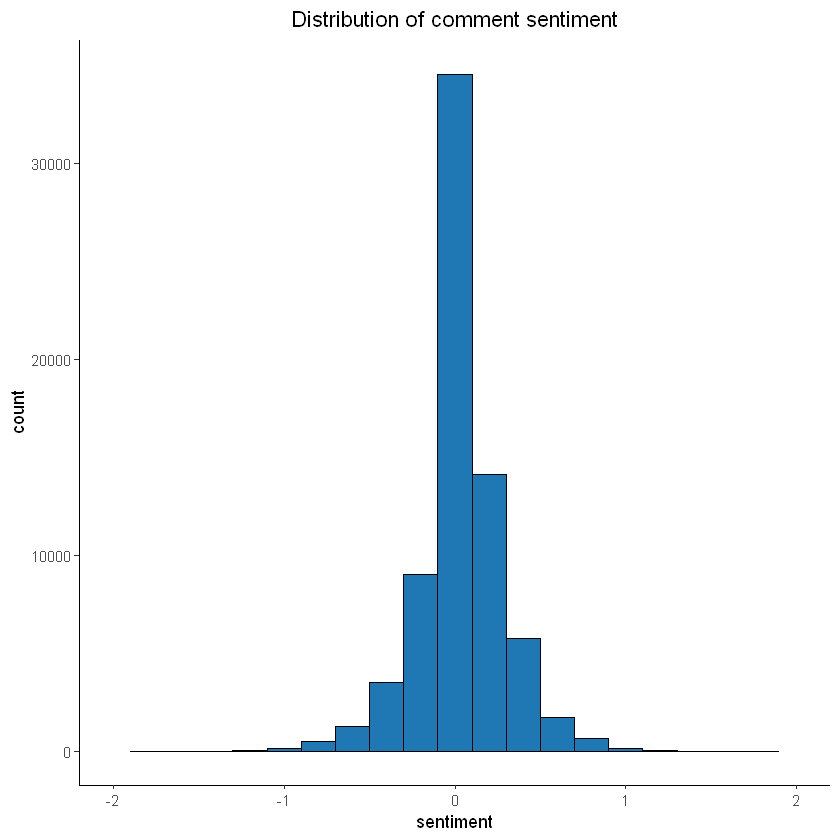

In [23]:
ggplot(cmt_smt, aes(x = sentiment)) +
  geom_histogram(binwidth = .2, colour="black", fill="#1f78b4") +
  xlim(-2,2) +
  ggtitle("Distribution of comment sentiment") +
  theme(axis.line = element_line(colour = "black"), panel.background = element_blank(),
        plot.title = element_text(hjust = 0.5))

The sentiment was normally distributed and neutral (mean = 0.03) when examined in aggregate rather than making a separation between pre and after-crisis comments. 

#### Average sentiments before and after crisis
At first sight, user sentiments are negatively affected after a brand crisis.

`summarise()` has grouped output by 'reference_scandaldate'. You can override
using the `.groups` argument.


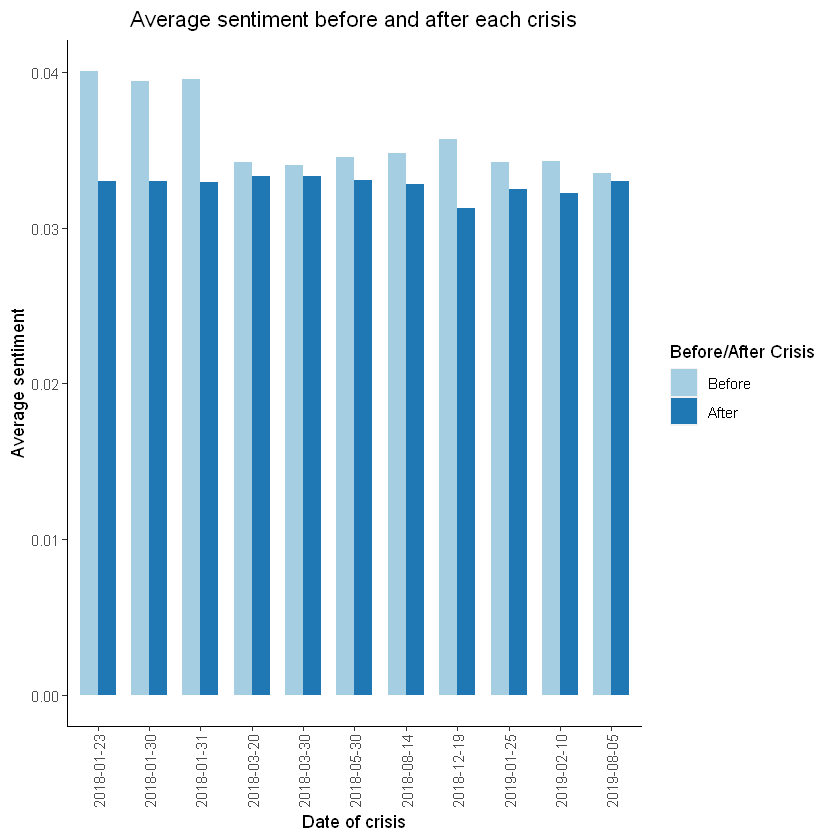

In [25]:
h1 <- select(cmt_control, -c("id"))

stat2_gr <- h1 %>%
  group_by(reference_scandaldate, flag_treatment) %>%
  summarise(avg_smt = mean(sentiment))

stat2_gr$reference_scandaldate <- as.factor(stat2_gr$reference_scandaldate)

#Graph for stat2
ggplot(data=stat2_gr, aes(x=reference_scandaldate, y=avg_smt, fill=flag_treatment)) +
  geom_bar(stat="identity", position=position_dodge(), width = 0.7) +
  xlab("Date of crisis") + ylab("Average sentiment") + 
  ggtitle("Average sentiment before and after each crisis") +
  scale_fill_brewer(palette="Paired", labels = c("Before", "After"), name = "Before/After Crisis") +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"),
        axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), 
        plot.title = element_text(hjust = 0.5))

## Regression model 1: The effect of brand crisis on community sentiment

First we look at the direct effect of all variables, including dependent variable and control variables. 

In [27]:
#Check the direct effect of all DV, find perfect multicolinearity in legis
testmod <- lm(sentiment ~ ., data = h1[,c(1,3:15)])
summary(testmod)


Call:
lm(formula = sentiment ~ ., data = h1[, c(1, 3:15)])

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4759 -0.0828 -0.0281  0.1228  7.8448 

Coefficients: (1 not defined because of singularities)
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   4.004e-02  3.814e-03  10.499  < 2e-16 ***
subredditindiangirlsontinder -1.251e-02  2.666e-03  -4.693 2.69e-06 ***
subreddittinder              -3.192e-03  2.638e-03  -1.210    0.226    
subreddittinderbr            -6.998e-02  4.638e-03 -15.088  < 2e-16 ***
subreddittindernsfw          -4.145e-02  3.161e-03 -13.114  < 2e-16 ***
subreddittindertrolling      -1.648e-01  3.121e-02  -5.279 1.30e-07 ***
flag_treatment1               2.659e-04  7.406e-04   0.359    0.720    
severity2                     6.999e-06  2.311e-03   0.003    0.998    
novelty2                     -5.391e-05  1.893e-03  -0.028    0.977    
reach3                        4.995e-05  1.342e-03   0.037    0.970   

In [33]:
#vif(testmod)
alias(testmod)

Model :
sentiment ~ subreddit + flag_treatment + severity + novelty + 
    reach + emp_cond + human_rights + fraud + products + social_disc + 
    emp_disc + legis + comp

Complete :
       (Intercept) subredditindiangirlsontinder subreddittinder
legis1  0           0                            0             
       subreddittinderbr subreddittindernsfw subreddittindertrolling
legis1  0                 0                   0                     
       flag_treatment1 severity2 novelty2 reach3 emp_cond1 human_rights1 fraud1
legis1  0               0         0        0      0         0             0    
       products1 social_disc1 emp_disc1 comp1
legis1  0         1           -1         0   


Here we found a perfect multicolinearity between 2 issues: "legis" ("Violation of national legislation") and "emp_disc" ("Discrimination in employment"). Therefore, the variable "legis" is excluded from all model from now on. 

Now, we examine the main regression model: 
community's sentiment ~ occurence of crisis + crisis related issues + severity + novelty + reach + subreddit:occurence of crisis

In [34]:
#Drop legis, fix multicolinearity, insignificant effect of treatment
#Include interaction effect between flag_treatment and subreddit --> better model
testmod11 <- lm(sentiment ~ . + flag_treatment:subreddit, data = h1[, c(1, 3:13, 15)])
summary(testmod11)


Call:
lm(formula = sentiment ~ . + flag_treatment:subreddit, data = h1[, 
    c(1, 3:13, 15)])

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4765 -0.0828 -0.0286  0.1225  7.8449 

Coefficients:
                                               Estimate Std. Error t value
(Intercept)                                   5.399e-02  9.101e-03   5.933
subredditindiangirlsontinder                 -2.874e-02  8.741e-03  -3.288
subreddittinder                              -1.696e-02  8.681e-03  -1.954
subreddittinderbr                            -8.392e-02  1.095e-02  -7.667
subreddittindernsfw                          -6.610e-02  9.728e-03  -6.795
subreddittindertrolling                      -1.688e-01  3.515e-02  -4.801
flag_treatment1                              -1.541e-02  9.095e-03  -1.695
severity2                                    -4.836e-05  2.311e-03  -0.021
novelty2                                      1.886e-05  1.893e-03   0.010
reach3                                       

The results show the statistically significant negative impact of brand crisis on community sentiment (b = -0.015, p = 0.091 
< 0.1). Hence, the hypothesis on the negative effect of brand crisis on community's sentiment is confirmed. 

Furthermore, all control variables regarding subreddit except “subreddittinder” (p= 0.051) are statistically significant and all their coefficients are negative. This result was expected as members of online communities can use several threads and blogs for different purposes and to express their negative and positive feelings. 

Regarding other control variables that are related to the characteristics of crises (severity, novelty, reach, and source of the crisis), these variables had mixed, yet statistically insignificant effects on the dependent variable. 

As for interaction effects, I have examined the interaction between different subreddits and brand crisis, and found that the interaction effects between brand crisis and subreddit Indiangirlsontinder (b=0.018; p=0.048) and Tindernsfw (b=0.028; p=0.007) were statistically significant. Interestingly, these interactions had a positive impact on the user sentiment contrary to the 
initial hypotheses.

# Regression 2: The effect of brand crisis on community sentiment

## Preparation of outcome variable: The number of comments before and after crisis 

In [36]:
#Count the number of comments in each subreddit before and after the crisis
n_cmt <- cmt_control %>%
  group_by(subreddit, reference_scandaldate, flag_treatment) %>%
  count(subreddit, name = "n_cmt")

n_cmt

subreddit,reference_scandaldate,flag_treatment,n_cmt
<fct>,<dttm>,<fct>,<int>
indianboysontinder,2018-01-23,1,854
indianboysontinder,2018-01-30,1,854
indianboysontinder,2018-01-31,1,854
indianboysontinder,2018-03-20,0,26
indianboysontinder,2018-03-20,1,828
indianboysontinder,2018-03-30,0,26
indianboysontinder,2018-03-30,1,828
indianboysontinder,2018-05-30,0,36
indianboysontinder,2018-05-30,1,818


## Preparation of control variables

The control variables were defined similarly to the first regression model. 

In [38]:
h2_control <- n_cmt %>%
  left_join(., tinder, by = c("subreddit", "reference_scandaldate")) %>%
  select(-c("RepRisk_ID", "RepRisk_story_ID", "related_topic_tags", "related_countries_codes", "company", "year",
            "related_issues", "related_UNGC_principles")) %>%
  setnames(., new = c("emp_cond", "human_rights", "fraud", "products", "social_disc", "emp_disc", "legis", "comp"), old = issue)

h2_control

subreddit,reference_scandaldate,flag_treatment,n_cmt,severity,novelty,reach,emp_cond,human_rights,fraud,products,social_disc,emp_disc,legis,comp
<fct>,<dttm>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
indianboysontinder,2018-01-23,1,854,1,2,2,0,1,0,0,0,0,0,0
indianboysontinder,2018-01-30,1,854,1,2,2,0,0,0,0,1,0,1,0
indianboysontinder,2018-01-31,1,854,1,2,3,0,0,0,0,1,0,1,1
indianboysontinder,2018-03-20,0,26,1,2,3,1,0,0,0,0,0,0,0
indianboysontinder,2018-03-20,1,828,1,2,3,1,0,0,0,0,0,0,0
indianboysontinder,2018-03-30,0,26,1,1,2,1,0,0,0,0,0,0,0
indianboysontinder,2018-03-30,1,828,1,1,2,1,0,0,0,0,0,0,0
indianboysontinder,2018-05-30,0,36,1,2,3,0,1,0,0,0,0,0,0
indianboysontinder,2018-05-30,1,818,1,2,3,0,1,0,0,0,0,0,0


## Descriptive statistics

#### Number of Comments in different subreddits (pre- vs post-crisis)
The number of comments is observed to rise after the crisis in all the subreddits excluding tindertrolling. This situation can be explained by the sparse number of comments in tindertrolling subreddit. 

In [40]:
summary(h2_control)

stat3_1 <- h2_control %>%
  group_by(subreddit, flag_treatment) %>%
  summarise(n_cmt = sum(n_cmt))

               subreddit  reference_scandaldate         flag_treatment
 indiangirlsontinder:22   Min.   :2018-01-23 00:00:00   0:63          
 tinder             :22   1st Qu.:2018-01-31 00:00:00   1:61          
 tinderbr           :22   Median :2018-05-30 00:00:00                 
 tindernsfw         :22   Mean   :2018-07-30 20:33:52                 
 indianboysontinder :19   3rd Qu.:2019-01-25 00:00:00                 
 tindertrolling     :17   Max.   :2019-08-05 00:00:00                 
 (Other)            : 0                                               
     n_cmt          severity        novelty          reach       emp_cond
 Min.   :    1   Min.   :1.000   Min.   :1.000   Min.   :2.000   0:56    
 1st Qu.:   95   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:2.000   1:68    
 Median :  681   Median :1.000   Median :2.000   Median :3.000           
 Mean   : 6360   Mean   :1.266   Mean   :1.726   Mean   :2.548           
 3rd Qu.: 6098   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:3.000

`summarise()` has grouped output by 'subreddit'. You can override using the
`.groups` argument.


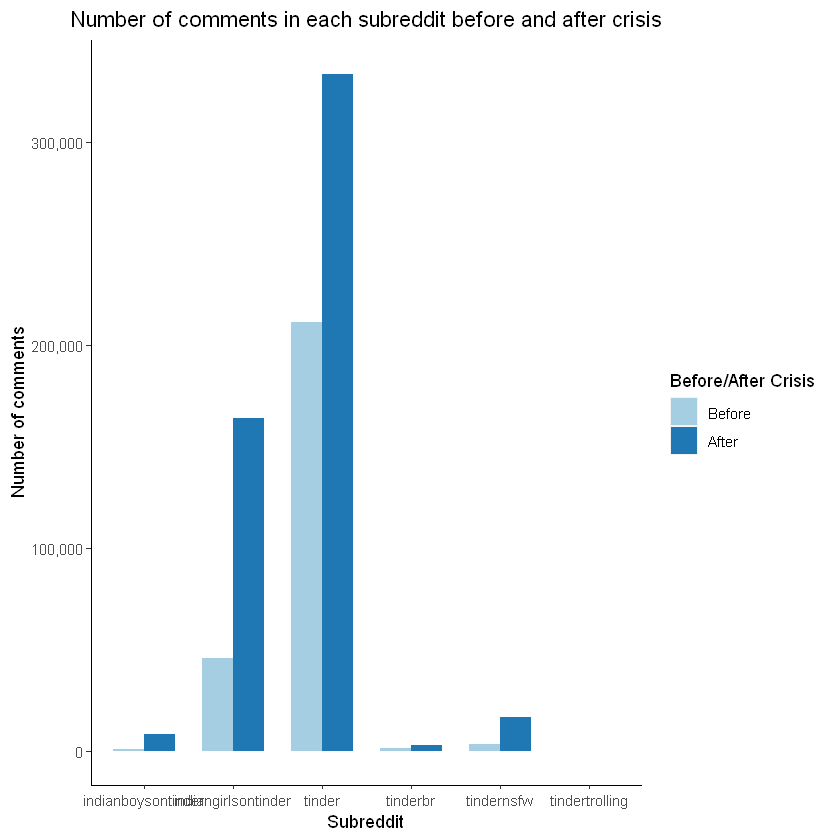

In [41]:
ggplot(data=stat3_1, aes(x=subreddit, y=n_cmt, fill=flag_treatment)) +
  geom_bar(stat="identity", position=position_dodge(), width = 0.7) +
  xlab("Subreddit") + ylab("Number of comments") +
  ggtitle("Number of comments in each subreddit before and after crisis") +
  scale_y_continuous(labels = scales :: comma) +
  scale_fill_brewer(palette="Paired", labels = c("Before", "After"), name = "Before/After Crisis") +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"),
        plot.title = element_text(hjust = 0.5))

## Regression 2

In [42]:
mod2 <- lm(n_cmt ~ . + flag_treatment:subreddit, data = h2_control[, c(1, 3:13, 15)])
summary(mod2)


Call:
lm(formula = n_cmt ~ . + flag_treatment:subreddit, data = h2_control[, 
    c(1, 3:13, 15)])

Residuals:
     Min       1Q   Median       3Q      Max 
-27216.7   -149.0      2.6    154.6  27222.2 

Coefficients:
                                               Estimate Std. Error t value
(Intercept)                                    126.1916  7681.2465   0.016
subredditindiangirlsontinder                  4048.5731  3149.4476   1.285
subreddittinder                              19108.4822  3149.4476   6.067
subreddittinderbr                               20.5731  3149.4476   0.007
subreddittindernsfw                            186.3913  3149.4476   0.059
subreddittindertrolling                       -104.0633  3149.4476  -0.033
flag_treatment1                                667.5731  3149.4476   0.212
severity                                        -9.6860  4869.0363  -0.002
novelty                                          9.6860  3934.0152   0.002
reach                          

Model 2’s results demonstrate that brand crisis is positively correlated with the number of comments (b=667.573), yet this effect was not statistically significant (p = 0.833). Therefore, our hypothesis on the negative effect of brand crisis on community's participation is rejected.

All control variables were statistically insignificantly related to community's participation, except for subreddit Tinder. 

Regarding interaction effects between brand crisis and subreddits, coefficients are positive, except in Tindertrolling and Indianboysontinder. Moreover, only the interaction effect between brand crisis and Indiangirlsontinder and Tindernsfw are statistically significant.